In [ ]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#Importing Dataframe
Data=pd.read_csv('/content/water_potability.csv')
Data

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

# Exploratory Data Analysis

In [ ]:
Data.shape #Giving no. of rows and columns of DataFrame

(3276, 10)

In [ ]:
Data.info() #prints information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
Data.isnull().sum() #returns the number of missing values in the dataset.

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
Data.describe() #returns description of the data in the DataFrame

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [ ]:
Data['Sulfate'].mean() #returns mean value of Sulfate col, similar for ph and trihalomethane

333.7757766108135

In [ ]:
Data.fillna(Data.mean(), inplace=True) #replaces the NULL values with a specified value i.e.mean value
Data

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.775777   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225        66.396293   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [ ]:
Data.isnull().sum() #again null value analysis


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
Data.info() #verifying information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
Data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.469956    32.879761   8768.570828     1.583085    36.142612   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.080795   196.967627  20927.833607     7.130299   333.775777   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        15.769881     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        56.647656     3.439711     0.000000  
50%      421.884968       14.218338        66.396293     3.955028     0.000000  
75%      481.792304       16.557652        76.666609     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

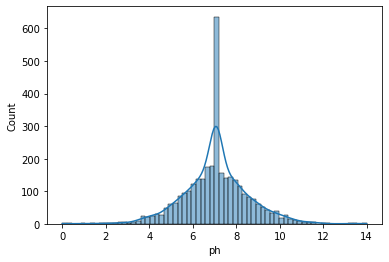

In [ ]:
#univariate analysis
sns.histplot(Data.ph,kde=True)


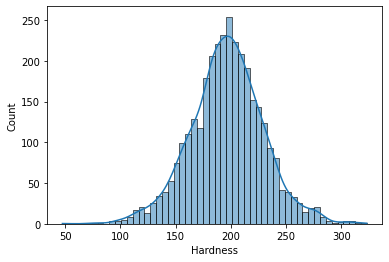

In [ ]:
sns.histplot(Data.Hardness,kde=True)

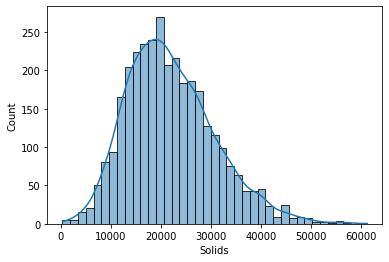

In [ ]:
sns.histplot(Data.Solids,kde=True)

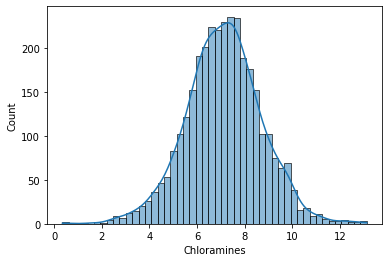

In [ ]:
sns.histplot(Data.Chloramines,kde=True)

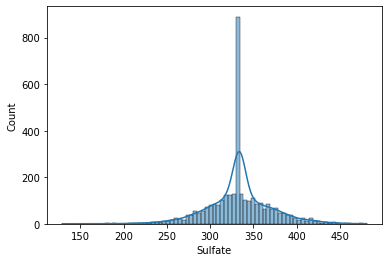

In [ ]:
sns.histplot(Data.Sulfate,kde=True)

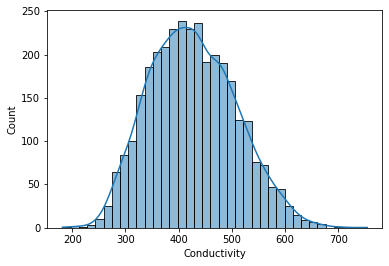

In [ ]:
sns.histplot(Data.Conductivity,kde=True)

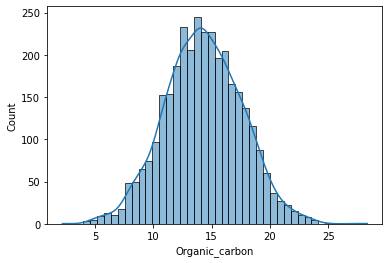

In [ ]:
sns.histplot(Data.Organic_carbon,kde=True)

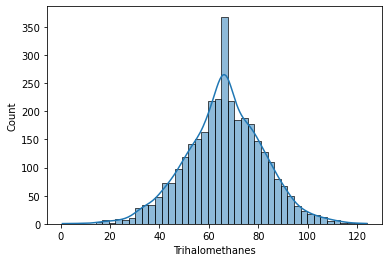

In [ ]:
sns.histplot(Data.Trihalomethanes,kde=True)

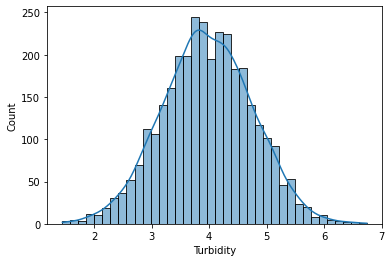

In [ ]:
sns.histplot(Data.Turbidity,kde=True)

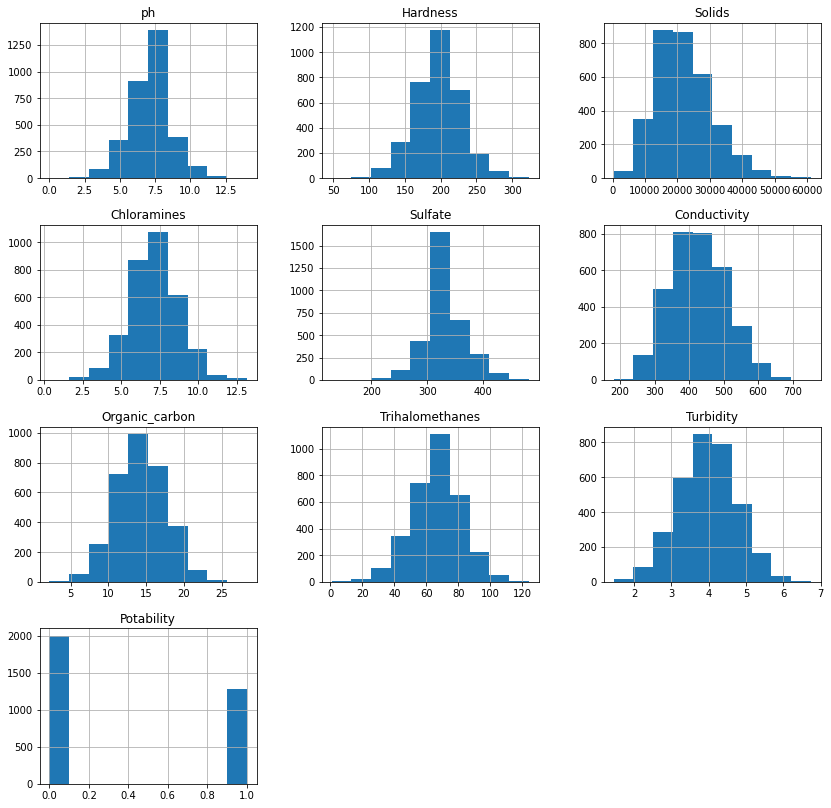

In [ ]:
Data.hist(figsize=(14,14)) # plotting all together 
plt.show()

In [ ]:
#correlation analysis
Data.corr()

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.075833 -0.081884    -0.031811  0.014403   
Hardness         0.075833  1.000000 -0.046899    -0.030054 -0.092766   
Solids          -0.081884 -0.046899  1.000000    -0.070148 -0.149840   
Chloramines     -0.031811 -0.030054 -0.070148     1.000000  0.023791   
Sulfate          0.014403 -0.092766 -0.149840     0.023791  1.000000   
Conductivity     0.017192 -0.023915  0.013831    -0.020486 -0.014059   
Organic_carbon   0.040061  0.003610  0.010242    -0.012653  0.026909   
Trihalomethanes  0.002994 -0.012690 -0.008875     0.016627 -0.025605   
Turbidity       -0.036222 -0.014449  0.019546     0.002363 -0.009790   
Potability      -0.003287 -0.013837  0.033743     0.023779 -0.020619   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.017192        0.040061         0.002994  -0.036222   
Hardness            -0.023915        0.003610        -0.012690  -0.014449   
Solids               0.013831        0.010242        -0.008875   0.019546   
Chloramines         -0.020486       -0.012653         0.016627   0.002363   
Sulfate             -0.014059        0.026909        -0.025605  -0.009790   
Conductivity         1.000000        0.020966         0.001255   0.005798   
Organic_carbon       0.020966        1.000000        -0.012976  -0.027308   
Trihalomethanes      0.001255       -0.012976         1.000000  -0.021502   
Turbidity            0.005798       -0.027308        -0.021502   1.000000   
Potability          -0.008128       -0.030001         0.006960   0.001581   

                 Potability  
ph                -0.003287  
Hardness          -0.013837  
Solids             0.033743  
Chloramines        0.023779  
Sulfate           -0.020619  
Conductivity      -0.008128  
Organic_carbon    -0.030001  
Trihalomethanes    0.006960  
Turbidity          0.001581  
Potability         1.000000

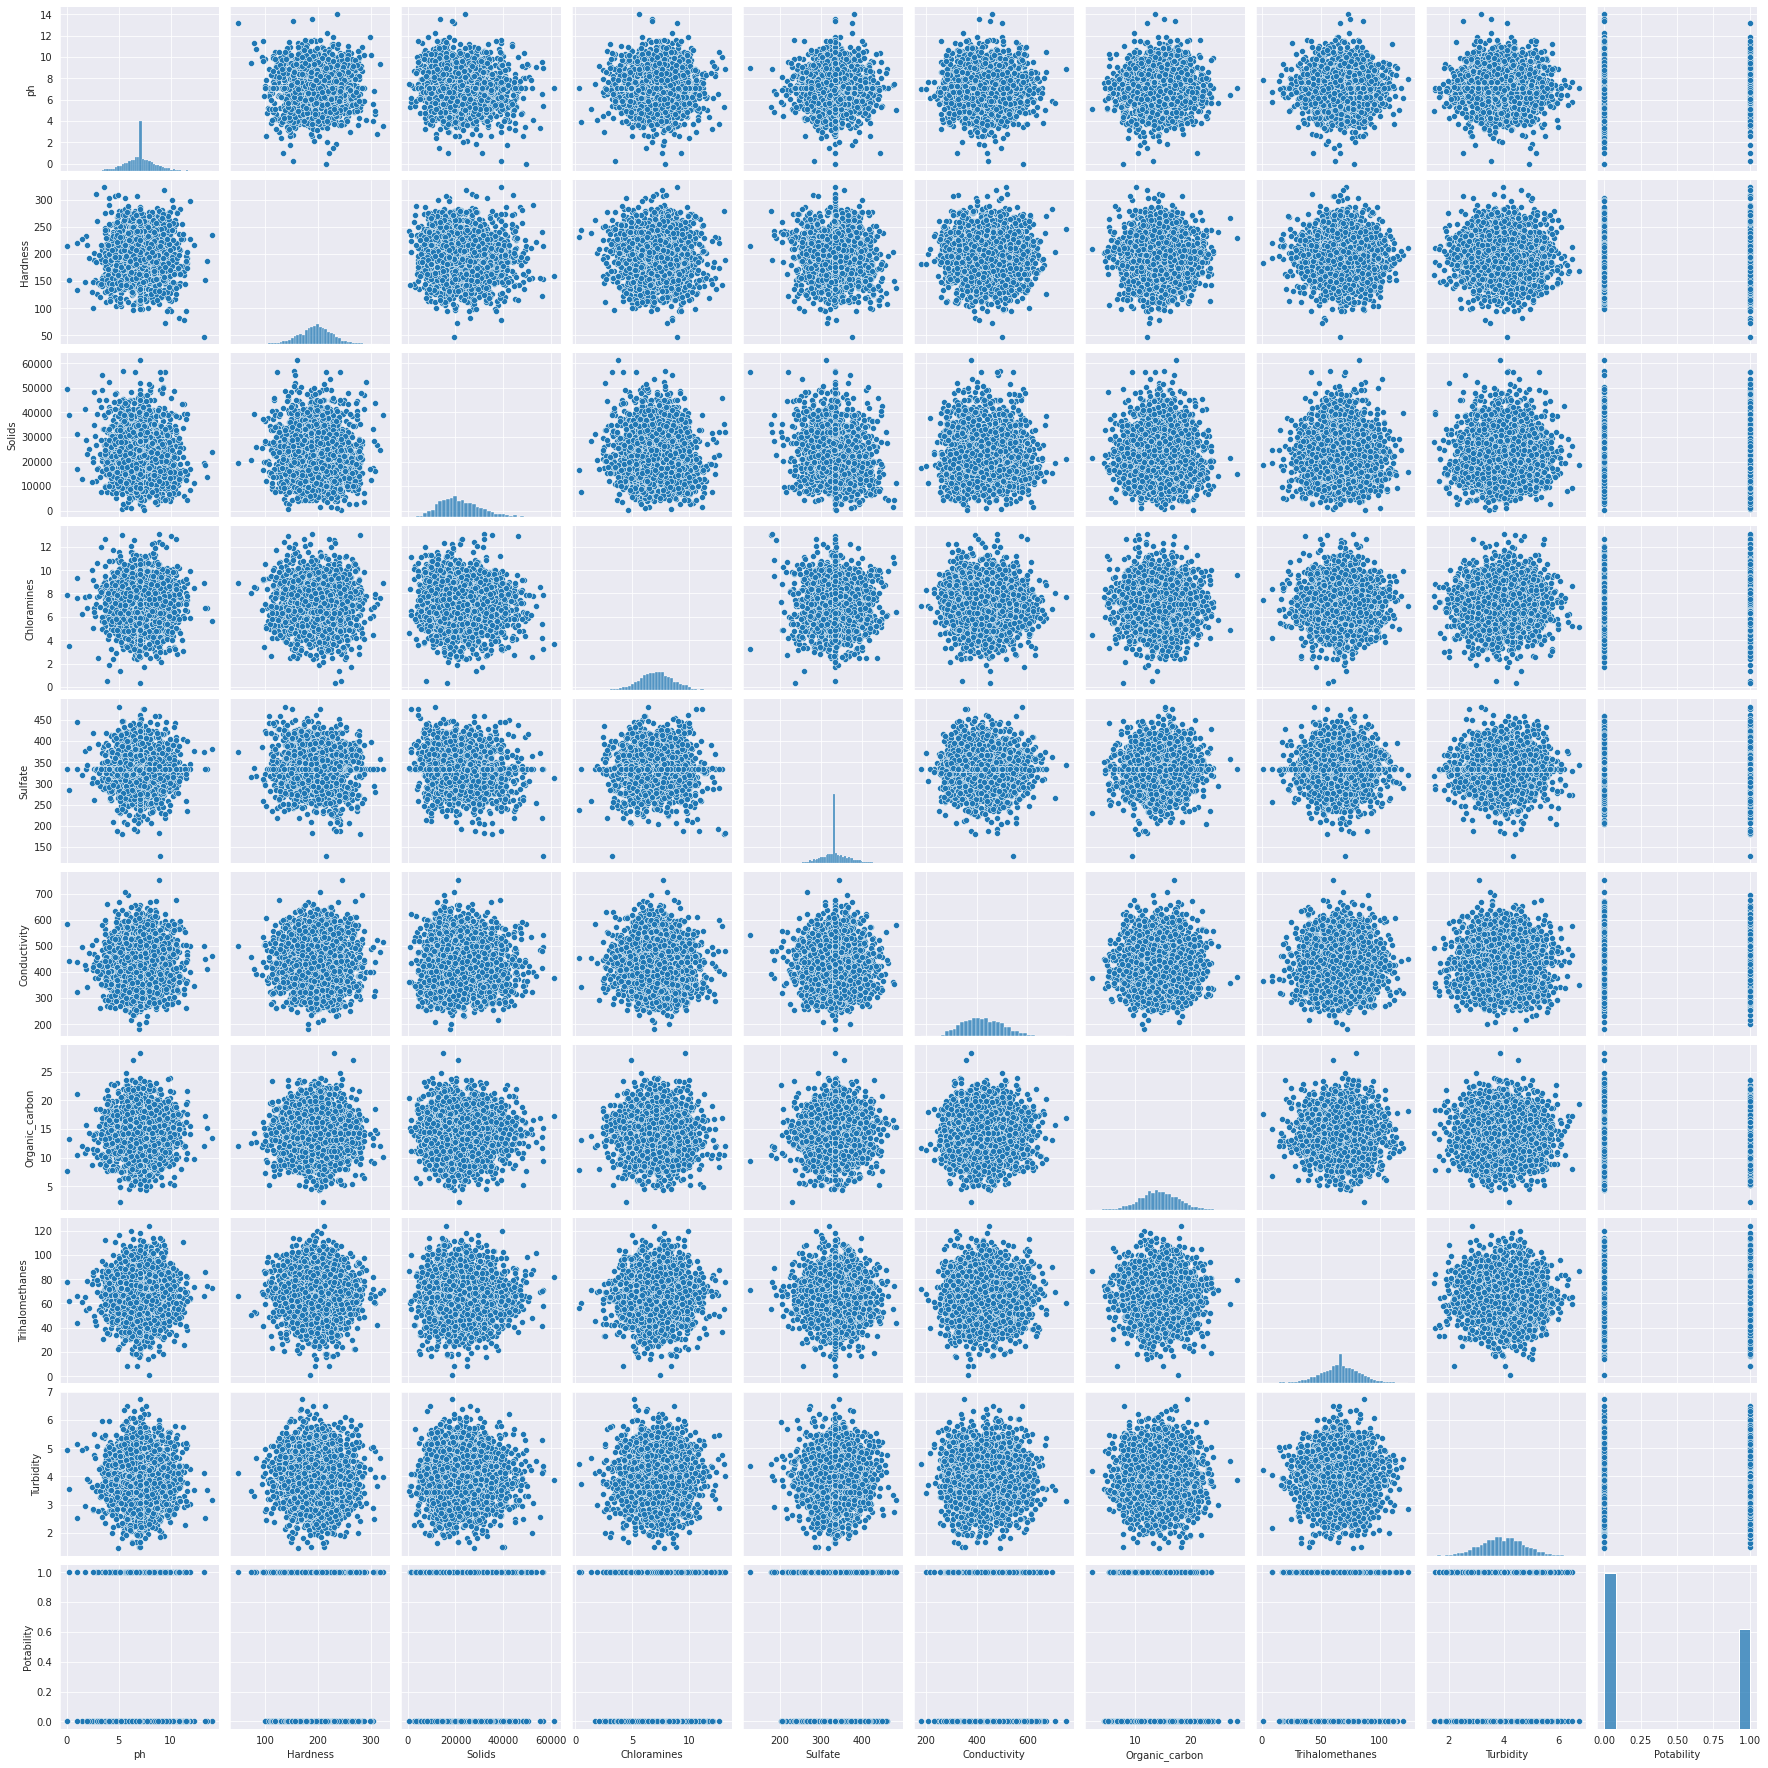

In [ ]:
#Bivariate Analysis
sns.set_style(style='darkgrid')
sns.pairplot(Data)

In [ ]:
#Bivariate Analysis of categorical variable Vs Continuous variable
Data.groupby(by='Potability').agg('mean')[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']]

ph    Hardness        Solids  Chloramines     Sulfate  \
Potability                                                                
0           7.084658  196.733292  21777.490788     7.092175  334.371700   
1           7.074754  195.800744  22383.991018     7.169338  332.844122   

            Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
Potability                                                            
0             426.730454       14.364335        66.308522   3.965800  
1             425.383800       14.160893        66.533513   3.968328

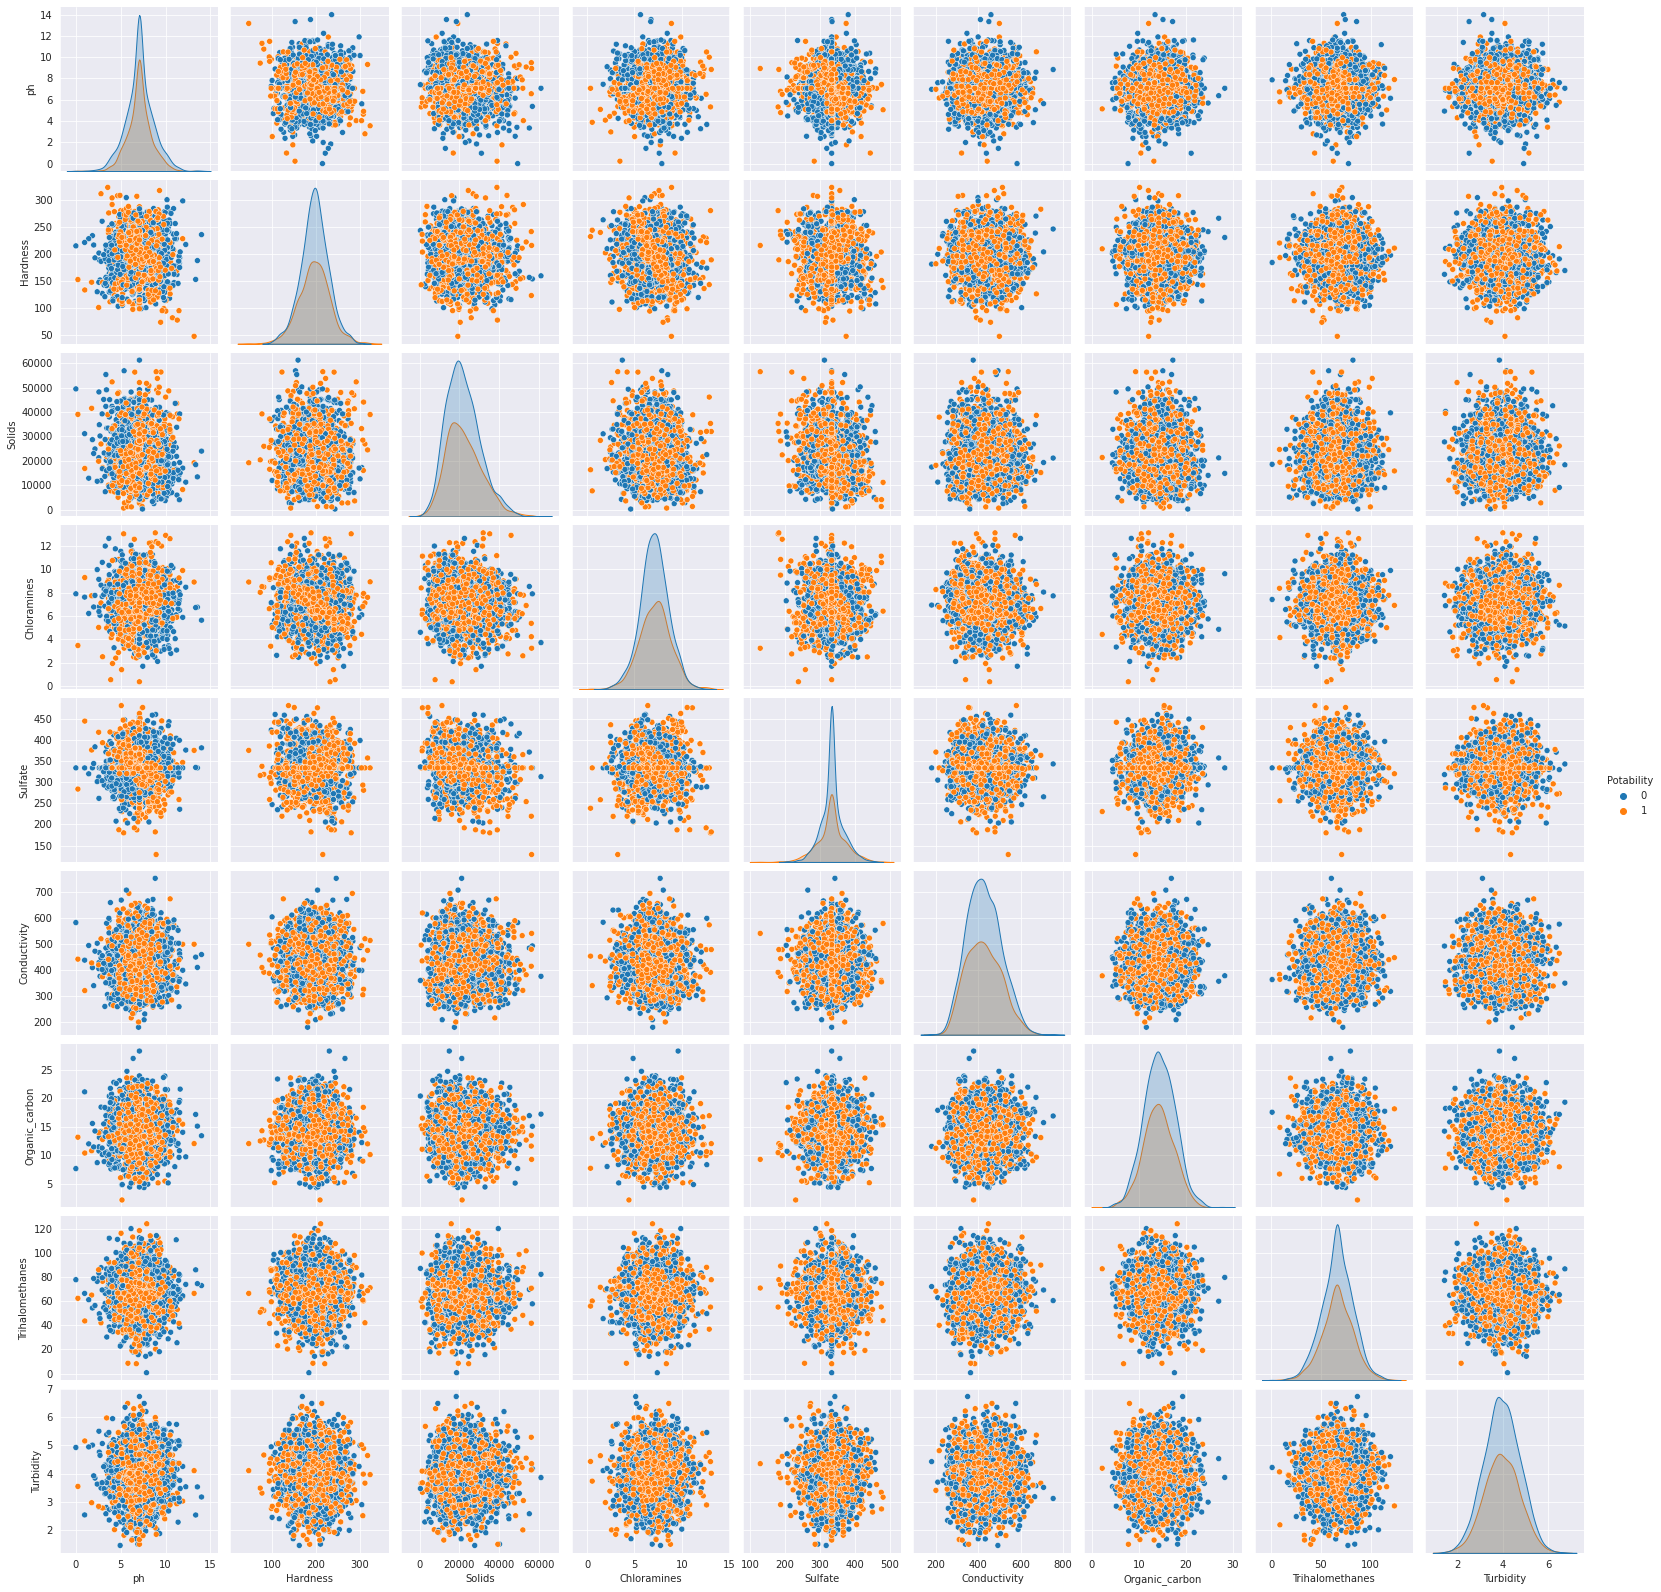

In [ ]:
#Multivariate Analysis
sns.pairplot(Data,hue='Potability')

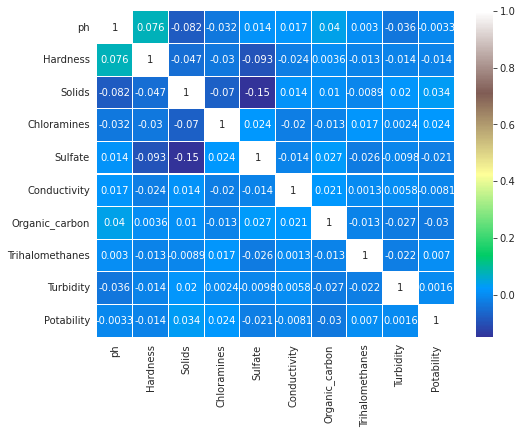

In [ ]:
# create a correlation heatmap
sns.heatmap(Data.corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

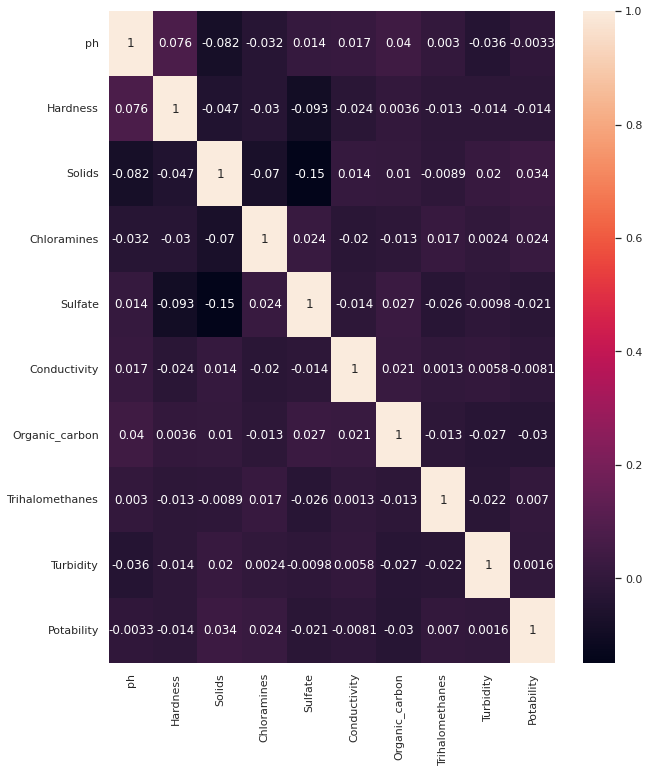

In [ ]:
sns.set(rc={"figure.figsize":[10,12]})
sns.heatmap(Data.corr(),annot=True);


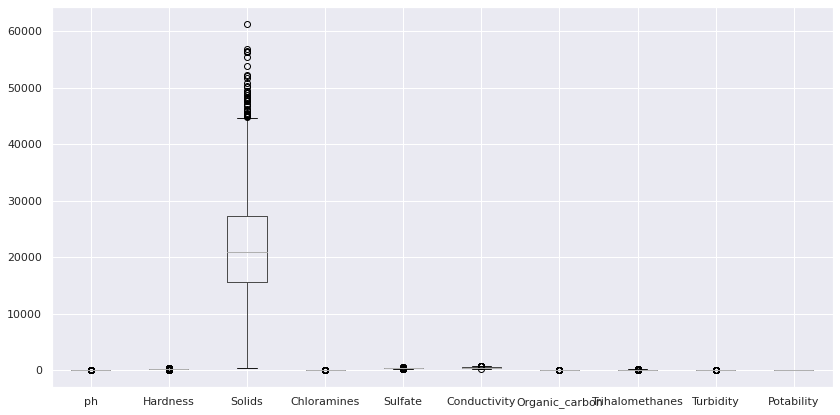

In [ ]:
Data.boxplot(figsize=(14,7))

In [ ]:
Data['Solids'].describe()

count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690297
50%      20927.833607
75%      27332.762127
max      61227.196008
Name: Solids, dtype: float64

In [ ]:
X = Data.drop('Potability', axis=1)
y = Data['Potability']
X.shape, y.shape

((3276, 9), (3276,))

## Processing the data

In [ ]:
# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

In [ ]:
X = scaler.fit_transform(X)
X

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

In [ ]:
# import train-test split 
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Using Logistic Regression




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
# Creating model object
model_lg = LogisticRegression(max_iter=120,random_state=0, n_jobs=20)

## Model Training

In [ ]:
# Training Model
model_lg.fit(X_train, y_train)

LogisticRegression(max_iter=120, n_jobs=20, random_state=0)

In [ ]:
# Making Prediction
pred_lg = model_lg.predict(X_test)

In [ ]:
# Calculating Accuracy Score
lg = accuracy_score(y_test, pred_lg)
print(lg)

0.6284658040665434


In [ ]:
print(classification_report(y_test,pred_lg))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       680
           1       0.00      0.00      0.00       402

    accuracy                           0.63      1082
   macro avg       0.31      0.50      0.39      1082
weighted avg       0.39      0.63      0.49      1082



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


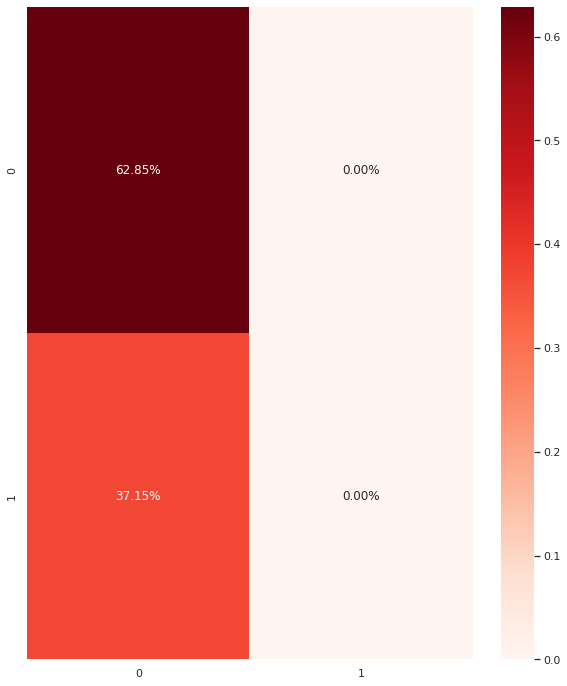

In [ ]:
# confusion Maxtrix
cm1 = confusion_matrix(y_test, pred_lg)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')

## Train decision tree classifier and checking accuracy

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
# Creating model object
dt=DecisionTreeClassifier(criterion= 'gini', min_samples_split= 10, splitter= 'best')

In [ ]:
# Training Model
dt.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=10)

In [ ]:
# Making Prediction and  Calculating Accuracy Score
prediction=dt.predict(X_test)
print(f"Accuracy Score = {accuracy_score(y_test,prediction)*100}")
print(f"Confusion Matrix =\n {confusion_matrix(y_test,prediction)}")
print(f"Classification Report =\n {classification_report(y_test,prediction)}")

Accuracy Score = 60.44362292051756
Confusion Matrix =
 [[459 221]
 [207 195]]
Classification Report =
               precision    recall  f1-score   support

           0       0.69      0.68      0.68       680
           1       0.47      0.49      0.48       402

    accuracy                           0.60      1082
   macro avg       0.58      0.58      0.58      1082
weighted avg       0.61      0.60      0.61      1082



In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.69      0.68      0.68       680
           1       0.47      0.49      0.48       402

    accuracy                           0.60      1082
   macro avg       0.58      0.58      0.58      1082
weighted avg       0.61      0.60      0.61      1082



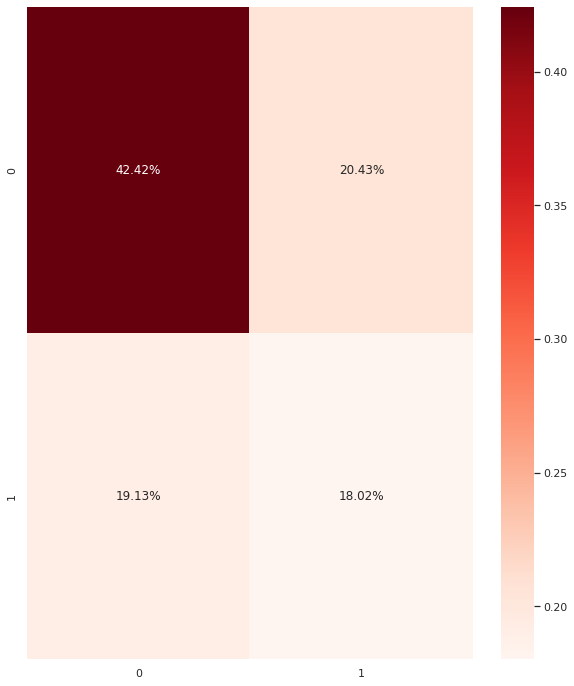

In [ ]:
# confusion Maxtrix
cm2 = confusion_matrix(y_test, prediction)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')

## Using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Creating model object
model_rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)

In [ ]:
# Training Model
model_rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=0.16, n_estimators=300, random_state=42)

In [ ]:
# Making Prediction
pred_rf = model_rf.predict(X_test)

In [ ]:
# Calculating Accuracy Score
rf = accuracy_score(y_test, pred_rf)
print(rf)

0.6284658040665434


In [ ]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       680
           1       0.00      0.00      0.00       402

    accuracy                           0.63      1082
   macro avg       0.31      0.50      0.39      1082
weighted avg       0.39      0.63      0.49      1082



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


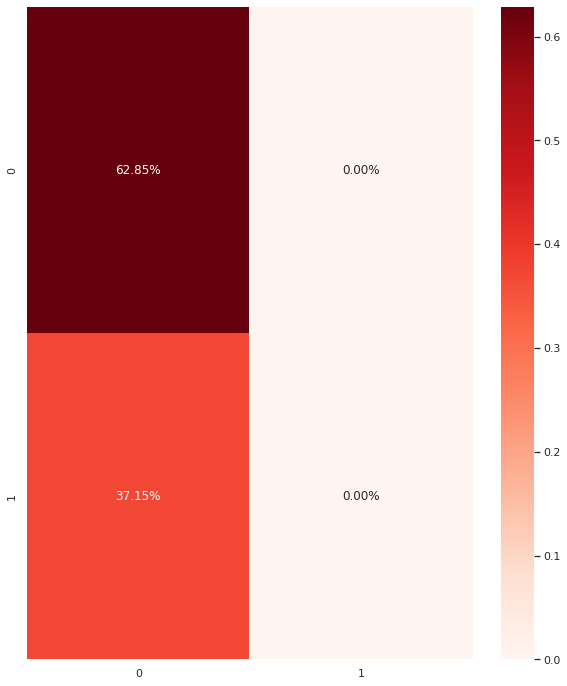

In [ ]:
# confusion Maxtrix
cm3 = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')

## Apply Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = DecisionTreeClassifier()
criterion = ["gini", "entropy"]
splitter = ["best", "random"]
min_samples_split = [2,4,6,8,10,12,14]

# define grid search
grid = dict(splitter=splitter, criterion=criterion, min_samples_split=min_samples_split)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_dt = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, 
                           scoring='accuracy',error_score=0)
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
print(f"Best: {grid_search_dt.best_score_:.3f} using {grid_search_dt.best_params_}")
means = grid_search_dt.cv_results_['mean_test_score']
stds = grid_search_dt.cv_results_['std_test_score']
params = grid_search_dt.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")
    
print("Training Score:",grid_search_dt.score(X_train, y_train)*100)
print("Testing Score:", grid_search_dt.score(X_test, y_test)*100)

Best: 0.591 using {'criterion': 'gini', 'min_samples_split': 8, 'splitter': 'random'}
0.585 (0.023) with: {'criterion': 'gini', 'min_samples_split': 2, 'splitter': 'best'}
0.578 (0.031) with: {'criterion': 'gini', 'min_samples_split': 2, 'splitter': 'random'}
0.579 (0.027) with: {'criterion': 'gini', 'min_samples_split': 4, 'splitter': 'best'}
0.571 (0.033) with: {'criterion': 'gini', 'min_samples_split': 4, 'splitter': 'random'}
0.582 (0.029) with: {'criterion': 'gini', 'min_samples_split': 6, 'splitter': 'best'}
0.578 (0.032) with: {'criterion': 'gini', 'min_samples_split': 6, 'splitter': 'random'}
0.580 (0.028) with: {'criterion': 'gini', 'min_samples_split': 8, 'splitter': 'best'}
0.591 (0.028) with: {'criterion': 'gini', 'min_samples_split': 8, 'splitter': 'random'}
0.578 (0.032) with: {'criterion': 'gini', 'min_samples_split': 10, 'splitter': 'best'}
0.575 (0.028) with: {'criterion': 'gini', 'min_samples_split': 10, 'splitter': 'random'}
0.583 (0.032) with: {'criterion': 'gini', 

## Using XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Creating model object
model_xgb = XGBClassifier(max_depth= 8, n_estimators= 125, random_state= 0,  learning_rate= 0.03, n_jobs=5)

In [ ]:
# Training Model
model_xgb.fit(X_train, y_train)

XGBClassifier(learning_rate=0.03, max_depth=8, n_estimators=125, n_jobs=5)

In [ ]:
# Making Prediction
pred_xgb = model_xgb.predict(X_test)

In [ ]:
# Calculating Accuracy Score
xgb = accuracy_score(y_test, pred_xgb)
print(xgb)

0.6709796672828097


In [ ]:
print(classification_report(y_test,pred_xgb))

              precision    recall  f1-score   support

           0       0.68      0.89      0.77       680
           1       0.61      0.31      0.41       402

    accuracy                           0.67      1082
   macro avg       0.65      0.60      0.59      1082
weighted avg       0.66      0.67      0.64      1082



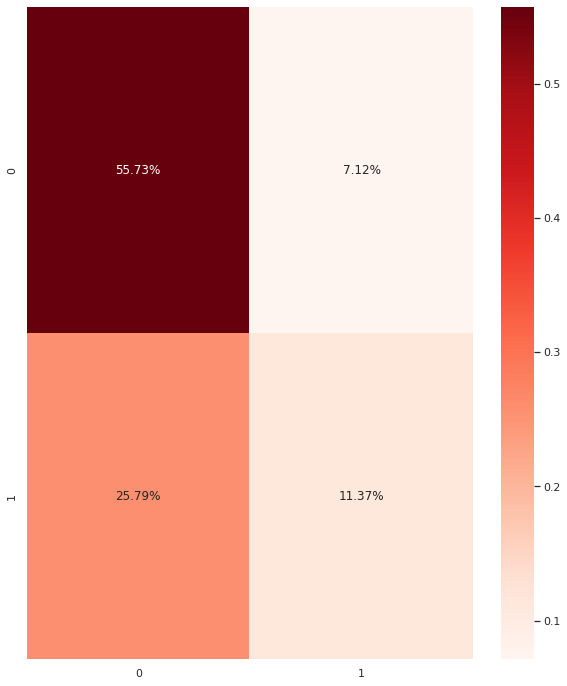

In [ ]:
# confusion Maxtrix
cm4 = confusion_matrix(y_test, pred_xgb)
sns.heatmap(cm4/np.sum(cm4), annot = True, fmt=  '0.2%', cmap = 'Reds')

## Using KNeighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Creating model object
model_kn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)

In [ ]:
# Training Model
model_kn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=9)

In [ ]:
# Making Prediction
pred_kn = model_kn.predict(X_test)

In [ ]:
# Calculating Accuracy Score
kn = accuracy_score(y_test, pred_kn)
print(kn)

0.6534195933456562


In [ ]:
print(classification_report(y_test,pred_kn))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75       680
           1       0.55      0.37      0.44       402

    accuracy                           0.65      1082
   macro avg       0.62      0.60      0.59      1082
weighted avg       0.64      0.65      0.63      1082



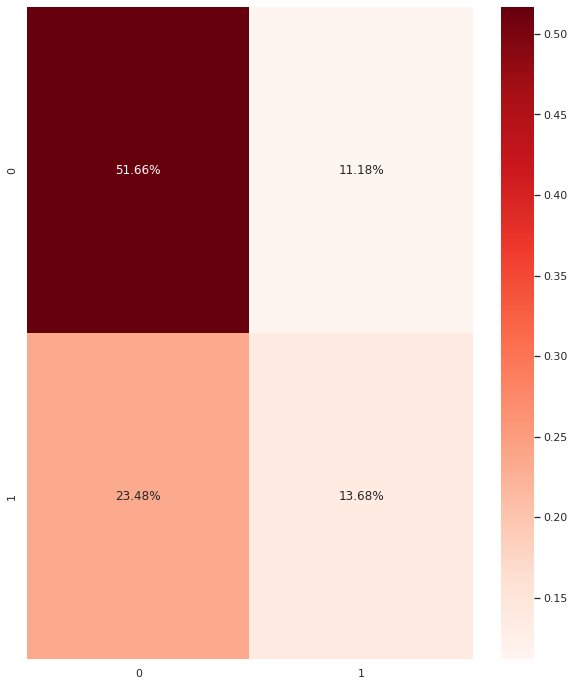

In [ ]:
# confusion Maxtrix
cm5 = confusion_matrix(y_test, pred_kn)
sns.heatmap(cm5/np.sum(cm5), annot = True, fmt=  '0.2%', cmap = 'Reds')

## Using SVM

In [ ]:
from sklearn.svm import SVC, LinearSVC

In [ ]:
model_svm = SVC(kernel='rbf', random_state = 42)

In [ ]:
model_svm.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
# Making Prediction
pred_svm = model_svm.predict(X_test)

In [ ]:
# Calculating Accuracy Score
sv = accuracy_score(y_test, pred_svm)
print(sv)

0.6885397412199631


In [ ]:
print(classification_report(y_test,pred_kn))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75       680
           1       0.55      0.37      0.44       402

    accuracy                           0.65      1082
   macro avg       0.62      0.60      0.59      1082
weighted avg       0.64      0.65      0.63      1082



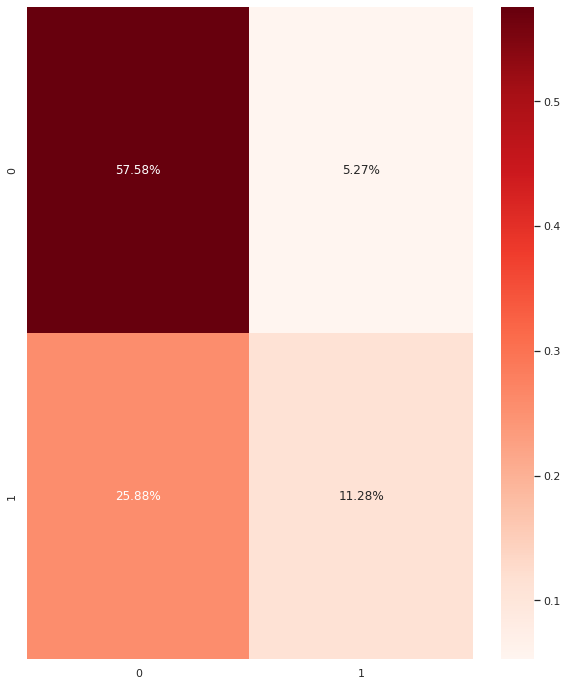

In [ ]:
# confusion Maxtrix
cm6 = confusion_matrix(y_test, pred_svm)
sns.heatmap(cm6/np.sum(cm6), annot = True, fmt=  '0.2%', cmap = 'Reds')

## ## Using AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model_ada = AdaBoostClassifier(learning_rate= 0.002,n_estimators= 205,random_state=42)

In [ ]:
model_ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.002, n_estimators=205, random_state=42)

In [ ]:
# Making Prediction
pred_ada = model_ada.predict(X_test)

In [ ]:
# Calculating Accuracy Score
ada = accuracy_score(y_test, pred_ada)
print(ada)

0.634011090573013


In [ ]:
print(classification_report(y_test,pred_ada))

              precision    recall  f1-score   support

           0       0.63      0.99      0.77       680
           1       0.62      0.04      0.07       402

    accuracy                           0.63      1082
   macro avg       0.62      0.51      0.42      1082
weighted avg       0.63      0.63      0.51      1082



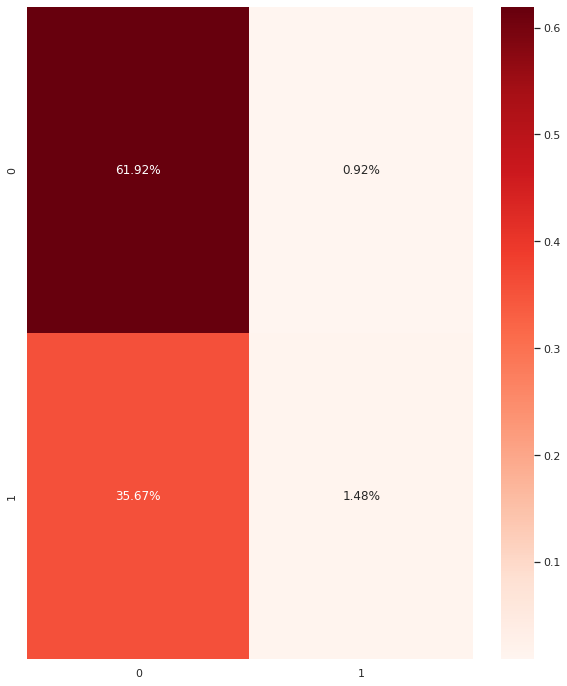

In [ ]:
# confusion Maxtrix
cm7 = confusion_matrix(y_test, pred_ada)
sns.heatmap(cm7/np.sum(cm7), annot = True, fmt=  '0.2%', cmap = 'Reds')

In [ ]:
Data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
Data

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.775777   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225        66.396293   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [ ]:
X

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [ ]:
X_train

array([[-6.04313345e-16, -1.16082577e+00,  2.64951758e+00, ...,
         5.44573447e-01, -8.17772524e-01,  1.82080247e-01],
       [ 7.23049618e-01, -4.23943661e-01, -1.29351080e+00, ...,
        -1.71009074e-01,  7.21297589e-01, -1.78651970e+00],
       [-1.15988267e+00, -3.29402371e-01,  1.59825910e+00, ...,
        -8.48097118e-02,  0.00000000e+00, -4.32592243e-01],
       ...,
       [-3.06471388e-01, -2.92273258e-01,  1.01798723e+00, ...,
        -1.41856697e-01,  1.29106439e+00, -6.10305010e-01],
       [ 1.15828844e+00,  6.58966182e-01, -6.65033798e-01, ...,
         6.25684572e-01, -1.22374139e+00,  3.93906412e-01],
       [-2.60347287e-01,  5.83053188e-02,  1.44421520e+00, ...,
        -6.37397372e-01,  0.00000000e+00, -2.67354008e-01]])

## Neural Network


In [ ]:
x_train=pd.DataFrame()
x_train[Data.drop("Potability",axis=1).columns]=X_train

In [ ]:
x_train.shape

(2194, 9)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# create a sequential model
model = Sequential()

# add a dense layer with 10 neurons and input shape of (784, )
model.add(Dense(10, input_dim=9, activation='relu'))

# add another dense layer with 10 neurons
model.add(Dense(20, activation='relu'))

# add another dense layer with 10 neurons
model.add(Dense(6, activation='relu'))

# add another dense layer with 10 neurons
model.add(Dense(8, activation='relu'))

# add another dense layer with 10 neurons
model.add(Dense(4, activation='relu'))


# add a final dense layer with 1 neuron and a sigmoid activation function
model.add(Dense(1, activation='sigmoid'))

# compile the model with binary crossentropy loss and adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [ ]:
X_train

array([[-6.04313345e-16, -1.16082577e+00,  2.64951758e+00, ...,
         5.44573447e-01, -8.17772524e-01,  1.82080247e-01],
       [ 7.23049618e-01, -4.23943661e-01, -1.29351080e+00, ...,
        -1.71009074e-01,  7.21297589e-01, -1.78651970e+00],
       [-1.15988267e+00, -3.29402371e-01,  1.59825910e+00, ...,
        -8.48097118e-02,  0.00000000e+00, -4.32592243e-01],
       ...,
       [-3.06471388e-01, -2.92273258e-01,  1.01798723e+00, ...,
        -1.41856697e-01,  1.29106439e+00, -6.10305010e-01],
       [ 1.15828844e+00,  6.58966182e-01, -6.65033798e-01, ...,
         6.25684572e-01, -1.22374139e+00,  3.93906412e-01],
       [-2.60347287e-01,  5.83053188e-02,  1.44421520e+00, ...,
        -6.37397372e-01,  0.00000000e+00, -2.67354008e-01]])

In [ ]:
# fit the model to the training data, validation_data=(X_test,y_test))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                100       
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 6)                 126       
                                                                 
 dense_3 (Dense)             (None, 8)                 56        
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 543
Trainable params: 543
Non-trainable pa

In [ ]:
len(y_train)

2194

In [ ]:
history = model.fit(x_train.values, y_train, validation_data = (X_test, y_test), batch_size = 2, epochs = 100)

Epoch 1/100
1097/1097 [==============================] - 4s 3ms/step - loss: 0.6760 - accuracy: 0.5989 - val_loss: 0.6592 - val_accuracy: 0.6285
Epoch 2/100
1097/1097 [==============================] - 3s 3ms/step - loss: 0.6679 - accuracy: 0.6003 - val_loss: 0.6596 - val_accuracy: 0.6285
Epoch 3/100
1097/1097 [==============================] - 4s 3ms/step - loss: 0.6619 - accuracy: 0.6035 - val_loss: 0.6455 - val_accuracy: 0.6285
Epoch 4/100
1097/1097 [==============================] - 4s 3ms/step - loss: 0.6499 - accuracy: 0.6185 - val_loss: 0.6389 - val_accuracy: 0.6433
Epoch 5/100
1097/1097 [==============================] - 4s 3ms/step - loss: 0.6357 - accuracy: 0.6304 - val_loss: 0.6284 - val_accuracy: 0.6571
Epoch 6/100
1097/1097 [==============================] - 4s 3ms/step - loss: 0.6209 - accuracy: 0.6509 - val_loss: 0.6230 - val_accuracy: 0.6516
Epoch 7/100
1097/1097 [==============================] - 4s 3ms/step - loss: 0.6110 - accuracy: 0.6677 - val_loss: 0.6182 - val_ac

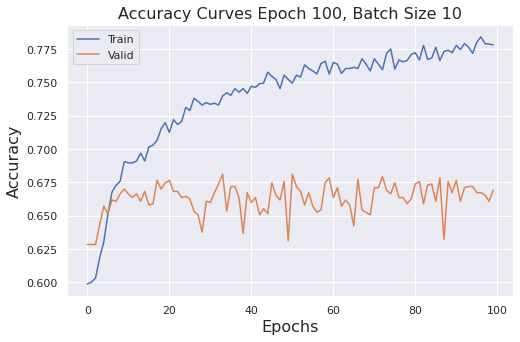

In [ ]:
plt.figure(figsize=[8,5])
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves Epoch 100, Batch Size 10', fontsize=16)
plt.show()

# polynominal Features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

In [ ]:
poly = PolynomialFeatures(degree=2)

In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [ ]:
x_train

ph  Hardness    Solids  Chloramines       Sulfate  \
0    -6.043133e-16 -1.160826  2.649518    -1.931587 -2.396312e+00   
1     7.230496e-01 -0.423944 -1.293511    -0.325011  3.145987e-15   
2    -1.159883e+00 -0.329402  1.598259     1.596915  2.687227e-01   
3     3.095162e-01  0.773329 -0.819454    -0.266051  9.031280e-01   
4    -3.147567e-01 -0.976888 -0.939575    -0.756117  3.145987e-15   
...            ...       ...       ...          ...           ...   
2189 -1.968593e+00  0.365165 -0.023312    -0.806248 -1.743796e-01   
2190  4.852044e-01 -0.955461  0.398395     0.471152  6.775150e-01   
2191 -3.064714e-01 -0.292273  1.017987     0.367190  3.145987e-15   
2192  1.158288e+00  0.658966 -0.665034     0.169440  7.695938e-03   
2193 -2.603473e-01  0.058305  1.444215    -0.542489  7.321302e-01   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0        -0.327157        0.544573        -0.817773   0.182080  
1         0.016583       -0.171009         0.721298  -1.786520  
2        -0.973127       -0.084810         0.000000  -0.432592  
3         1.945650        1.042101        -0.425573   0.309598  
4        -1.373634       -0.665970        -0.312153  -0.217514  
...            ...             ...              ...        ...  
2189     -2.000910       -0.922050        -1.250276   0.802515  
2190     -0.343326        0.306116         0.000000   0.324559  
2191     -1.179643       -0.141857         1.291064  -0.610305  
2192     -0.460125        0.625685        -1.223741   0.393906  
2193      0.058530       -0.637397         0.000000  -0.267354  

[2194 rows x 9 columns]

In [ ]:
X_poly=poly.transform(x_train)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


In [ ]:
X_poly

array([[ 1.00000000e+00, -6.04313345e-16, -1.16082577e+00, ...,
         6.68751901e-01, -1.48900224e-01,  3.31532165e-02],
       [ 1.00000000e+00,  7.23049618e-01, -4.23943661e-01, ...,
         5.20270212e-01, -1.28861235e+00,  3.19165265e+00],
       [ 1.00000000e+00, -1.15988267e+00, -3.29402371e-01, ...,
         0.00000000e+00, -0.00000000e+00,  1.87136049e-01],
       ...,
       [ 1.00000000e+00, -3.06471388e-01, -2.92273258e-01, ...,
         1.66684727e+00, -7.87943068e-01,  3.72472205e-01],
       [ 1.00000000e+00,  1.15828844e+00,  6.58966182e-01, ...,
         1.49754300e+00, -4.82039582e-01,  1.55162261e-01],
       [ 1.00000000e+00, -2.60347287e-01,  5.83053188e-02, ...,
         0.00000000e+00, -0.00000000e+00,  7.14781656e-02]])

In [ ]:
from sklearn.linear_model import LogisticRegression
linear_model=LogisticRegression()

In [ ]:
linear_model.fit(X_poly,y_train)

LogisticRegression()

In [ ]:
x_poly_test=poly.transform(X_test)

In [ ]:
y_test

2947    0
2782    1
1644    0
70      0
2045    1
       ..
1662    0
445     0
617     0
1474    0
2555    0
Name: Potability, Length: 1082, dtype: int64

In [ ]:
pd.DataFrame(linear_model.predict(x_poly_test))

0
0     0
1     0
2     0
3     0
4     0
...  ..
1077  0
1078  0
1079  0
1080  0
1081  0

[1082 rows x 1 columns]

In [ ]:
y_test.values

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,pd.DataFrame(linear_model.predict(x_poly_test))))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       680
           1       0.66      0.31      0.42       402

    accuracy                           0.68      1082
   macro avg       0.67      0.61      0.60      1082
weighted avg       0.68      0.68      0.65      1082



In [ ]:
x_train

ph  Hardness    Solids  Chloramines       Sulfate  \
0    -6.043133e-16 -1.160826  2.649518    -1.931587 -2.396312e+00   
1     7.230496e-01 -0.423944 -1.293511    -0.325011  3.145987e-15   
2    -1.159883e+00 -0.329402  1.598259     1.596915  2.687227e-01   
3     3.095162e-01  0.773329 -0.819454    -0.266051  9.031280e-01   
4    -3.147567e-01 -0.976888 -0.939575    -0.756117  3.145987e-15   
...            ...       ...       ...          ...           ...   
2189 -1.968593e+00  0.365165 -0.023312    -0.806248 -1.743796e-01   
2190  4.852044e-01 -0.955461  0.398395     0.471152  6.775150e-01   
2191 -3.064714e-01 -0.292273  1.017987     0.367190  3.145987e-15   
2192  1.158288e+00  0.658966 -0.665034     0.169440  7.695938e-03   
2193 -2.603473e-01  0.058305  1.444215    -0.542489  7.321302e-01   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0        -0.327157        0.544573        -0.817773   0.182080  
1         0.016583       -0.171009         0.721298  -1.786520  
2        -0.973127       -0.084810         0.000000  -0.432592  
3         1.945650        1.042101        -0.425573   0.309598  
4        -1.373634       -0.665970        -0.312153  -0.217514  
...            ...             ...              ...        ...  
2189     -2.000910       -0.922050        -1.250276   0.802515  
2190     -0.343326        0.306116         0.000000   0.324559  
2191     -1.179643       -0.141857         1.291064  -0.610305  
2192     -0.460125        0.625685        -1.223741   0.393906  
2193      0.058530       -0.637397         0.000000  -0.267354  

[2194 rows x 9 columns]

In [ ]:
X_train

array([[-6.04313345e-16, -1.16082577e+00,  2.64951758e+00, ...,
         5.44573447e-01, -8.17772524e-01,  1.82080247e-01],
       [ 7.23049618e-01, -4.23943661e-01, -1.29351080e+00, ...,
        -1.71009074e-01,  7.21297589e-01, -1.78651970e+00],
       [-1.15988267e+00, -3.29402371e-01,  1.59825910e+00, ...,
        -8.48097118e-02,  0.00000000e+00, -4.32592243e-01],
       ...,
       [-3.06471388e-01, -2.92273258e-01,  1.01798723e+00, ...,
        -1.41856697e-01,  1.29106439e+00, -6.10305010e-01],
       [ 1.15828844e+00,  6.58966182e-01, -6.65033798e-01, ...,
         6.25684572e-01, -1.22374139e+00,  3.93906412e-01],
       [-2.60347287e-01,  5.83053188e-02,  1.44421520e+00, ...,
        -6.37397372e-01,  0.00000000e+00, -2.67354008e-01]])

In [ ]:
x_test=pd.DataFrame()
x_test[x_train.columns]=X_test

In [ ]:
x_train

ph  Hardness    Solids  Chloramines       Sulfate  \
0    -6.043133e-16 -1.160826  2.649518    -1.931587 -2.396312e+00   
1     7.230496e-01 -0.423944 -1.293511    -0.325011  3.145987e-15   
2    -1.159883e+00 -0.329402  1.598259     1.596915  2.687227e-01   
3     3.095162e-01  0.773329 -0.819454    -0.266051  9.031280e-01   
4    -3.147567e-01 -0.976888 -0.939575    -0.756117  3.145987e-15   
...            ...       ...       ...          ...           ...   
2189 -1.968593e+00  0.365165 -0.023312    -0.806248 -1.743796e-01   
2190  4.852044e-01 -0.955461  0.398395     0.471152  6.775150e-01   
2191 -3.064714e-01 -0.292273  1.017987     0.367190  3.145987e-15   
2192  1.158288e+00  0.658966 -0.665034     0.169440  7.695938e-03   
2193 -2.603473e-01  0.058305  1.444215    -0.542489  7.321302e-01   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0        -0.327157        0.544573        -0.817773   0.182080  
1         0.016583       -0.171009         0.721298  -1.786520  
2        -0.973127       -0.084810         0.000000  -0.432592  
3         1.945650        1.042101        -0.425573   0.309598  
4        -1.373634       -0.665970        -0.312153  -0.217514  
...            ...             ...              ...        ...  
2189     -2.000910       -0.922050        -1.250276   0.802515  
2190     -0.343326        0.306116         0.000000   0.324559  
2191     -1.179643       -0.141857         1.291064  -0.610305  
2192     -0.460125        0.625685        -1.223741   0.393906  
2193      0.058530       -0.637397         0.000000  -0.267354  

[2194 rows x 9 columns]

In [ ]:
x_train.drop(i,axis=1).columns.values

NameError: ignored

In [ ]:
import warnings
warnings.filterwarnings("ignore", message="deprecated", category=DeprecationWarning)


In [ ]:
for i in x_train.columns:
  Logic=LogisticRegression()
  Logic.fit(x_train.drop(i,axis=1),y_train)
  print(f"Model Trained with columns: {x_train.drop(i,axis=1).columns.values}")
  print(f"Classfication report Shown Below : \n  {classification_report(y_test,Logic.predict(x_test.drop(i,axis=1)))}")